In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inLine
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../Datasets- I/pima-indians-diabetes.txt', sep=",",header=None)
print(df)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


## Encoding the categorical data

### One-Hot Encoding

In [4]:
df = df.iloc[:,:].values

In [5]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[8])],remainder='passthrough')

In [8]:
enn=ct.fit_transform(df)

In [9]:
enn

array([[ 0.   ,  1.   ,  6.   , ..., 33.6  ,  0.627, 50.   ],
       [ 1.   ,  0.   ,  1.   , ..., 26.6  ,  0.351, 31.   ],
       [ 0.   ,  1.   ,  8.   , ..., 23.3  ,  0.672, 32.   ],
       ...,
       [ 1.   ,  0.   ,  5.   , ..., 26.2  ,  0.245, 30.   ],
       [ 0.   ,  1.   ,  1.   , ..., 30.1  ,  0.349, 47.   ],
       [ 1.   ,  0.   ,  1.   , ..., 30.4  ,  0.315, 23.   ]])

In [10]:
enn=pd.DataFrame(enn)

In [11]:
enn

0    1     2      3     4     5      6     7      8     9
0    0.0  1.0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0
1    1.0  0.0   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0
2    0.0  1.0   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0
3    1.0  0.0   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0
4    0.0  1.0   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0
..   ...  ...   ...    ...   ...   ...    ...   ...    ...   ...
763  1.0  0.0  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0
764  1.0  0.0   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0
765  1.0  0.0   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0
766  0.0  1.0   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0
767  1.0  0.0   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0

[768 rows x 10 columns]

## Handling the imbalanced data
#### Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.
## Smote:
#### SMOTE is an oversampling technique that generates synthetic samples from the minority class.
#### It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.


C:\Users\1771138\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


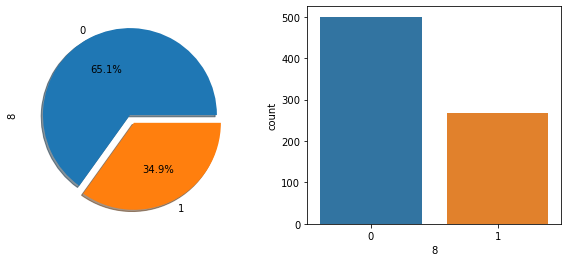

In [12]:
df1 = pd.read_csv('../Datasets- I/pima-indians-diabetes.txt', sep=",",header=None)
f,ax=plt.subplots(1,2,figsize=(10,4))


df1[8].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot(8,data=df1,ax=ax[1])

plt.show()

In [13]:
features = [0,1,2,3,4,5,6,7]

In [14]:
x = df1[features]
y = df1[8]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [16]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(x_train,y_train)

C:\Users\1771138\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


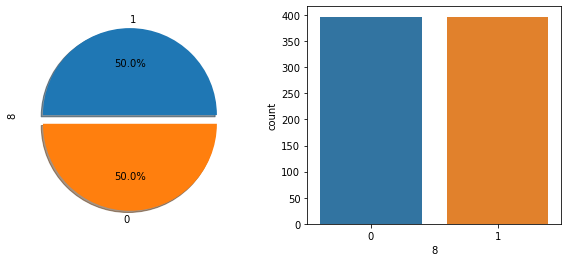

In [17]:
f,ax=plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot(y_over,ax=ax[1])

plt.show()